In [6]:
# Resource: https://github.com/taisdias76/data_cleaning_transformation/tree/main 
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/tribasuki74/ZeroToHero/refs/heads/main/dataset/fifa21%20raw%20data%20v2.csv')


/var/folders/y7/vnb4sg4j405c69m5qs8wskcw0000gn/T/ipykernel_42099/879707547.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/tribasuki74/ZeroToHero/refs/heads/main/dataset/fifa21%20raw%20data%20v2.csv')


In [8]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [9]:
#rows and columns
df.shape

(18979, 77)

In [10]:
# Get information about data types, non-null counts and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [11]:
df.isnull().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         2595
Length: 77, dtype: int64

### Data Cleaning
#### Create a copy of DataFrame

In [12]:
fifa = df.copy()

In [13]:
fifa.sample(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
12497,232581,Eduardo,Carlos Eduardo Bendini Giusti,https://cdn.sofifa.com/players/232/581/21_60.png,http://sofifa.com/player/232581/carlos-eduardo...,Brazil,27,63,65,\n\n\n\nSagan Tosu,2020 ~ 2021,CB,184cm,84kg,Left,65,CB,04-Jan-20,NaN,€500K,€1K,€497K,208,40,19,64,55,30,207,50,32,25,48,52,253,40,73,34,60,46,321,64,50,81,90,36,216,60,61,28,33,34,60,182,57,64,61,57,9,6,15,13,14,1444,325,3 ★,2★,Low,High,1 ★,58,33,44,49,61,80,2
11471,244118,D. Bertrand,Dorian Bertrand,https://cdn.sofifa.com/players/244/118/21_60.png,http://sofifa.com/player/244118/dorian-bertran...,France,27,64,64,\n\n\n\nAS Nancy Lorraine,2019 ~ 2022,"RM, LM",176cm,64kg,Left,64,RM,19-Jul-19,NaN,€625K,€2K,€831K,294,61,63,49,62,59,309,74,61,60,46,68,339,74,69,65,53,78,237,70,33,45,37,52,234,31,20,58,58,67,52,75,21,26,28,45,5,7,14,13,6,1533,325,2 ★,3★,Medium,Low,1 ★,71,62,58,70,26,38,4
5091,257189,P. López,Pablo López,https://cdn.sofifa.com/players/257/189/21_60.png,http://sofifa.com/player/257189/pablo-lopez/21...,Uruguay,23,70,73,\n\n\n\nDeportivo Toluca,2017 ~ 2024,"CAM, RW, LW",169cm,63kg,Right,72,CAM,01-Jan-17,NaN,€2.2M,€11K,€4.1M,316,65,68,50,68,65,332,72,60,58,65,77,348,68,70,75,65,70,330,65,60,70,65,70,286,51,25,70,70,70,65,112,30,40,42,53,12,9,14,12,6,1777,374,3 ★,4★,High,Low,1 ★,69,68,66,73,35,63,3


1. ID - identifier for each player

In [14]:
fifa['ID'].dtype

dtype('int64')

In [15]:
#Change data type for 'ID' from numeric to text
fifa['ID'] = fifa['ID'].astype(str)

In [16]:
fifa['ID'].dtype

dtype('O')

2. Nationality -
Player's nationality

In [17]:
fifa['Nationality'].dtype

dtype('O')

In [18]:
fifa['Nationality'].unique()

array(['Argentina', 'Portugal', 'Slovenia', 'Belgium', 'Brazil', 'Poland',
       'Egypt', 'France', 'Germany', 'Netherlands', 'Senegal', 'Spain',
       'England', 'Scotland', 'Korea Republic', 'Costa Rica', 'Italy',
       'Gabon', 'Croatia', 'Uruguay', 'Switzerland', 'Serbia', 'Slovakia',
       'Morocco', 'Algeria', 'Denmark', 'Hungary', 'Bosnia Herzegovina',
       'Nigeria', 'Cameroon', 'Norway', 'Ghana', 'Mexico', 'Austria',
       'Albania', 'Colombia', 'Chile', 'Ivory Coast', 'Greece', 'Finland',
       'Wales', 'Sweden', 'Togo', 'Czech Republic', 'Russia', 'Venezuela',
       'Canada', 'United States', 'Guinea', 'Montenegro', 'Israel',
       'Republic of Ireland', 'Ukraine', 'Turkey', 'Ecuador', 'Jamaica',
       'DR Congo', 'Australia', 'China PR', 'Armenia', 'Northern Ireland',
       'North Macedonia', 'Kosovo', 'Mali', 'Peru',
       'Central African Republic', 'Iceland', 'Burkina Faso', 'Paraguay',
       'Japan', 'Romania', 'New Zealand', 'Iran', 'Angola', 'Tunisia',
 

In [19]:
fifa['Nationality'].isnull().any()

np.False_

3. Club -
Current Club of the player

In [20]:
fifa['Club'].dtype

dtype('O')

In [21]:
fifa['Club'].unique()

array(['\n\n\n\nFC Barcelona', '\n\n\n\nJuventus',
       '\n\n\n\nAtlético Madrid', '\n\n\n\nManchester City',
       '\n\n\n\nParis Saint-Germain', '\n\n\n\nFC Bayern München',
       '\n\n\n\nLiverpool', '\n\n\n\nReal Madrid', '\n\n\n\nChelsea',
       '\n\n\n\nTottenham Hotspur', '\n\n\n\nInter', '\n\n\n\nNapoli',
       '\n\n\n\nBorussia Dortmund', '\n\n\n\nManchester United',
       '\n\n\n\nArsenal', '\n\n\n\nLazio', '\n\n\n\nLeicester City',
       '\n\n\n\nBorussia Mönchengladbach', '\n\n\n\nReal Sociedad',
       '\n\n\n\nAtalanta', '\n\n\n\nOlympique Lyonnais', '\n\n\n\nMilan',
       '\n\n\n\nVillarreal CF', '\n\n\n\nRB Leipzig', '\n\n\n\nCagliari',
       '\n\n\n\nAjax', '\n\n\n\nSL Benfica', '\n\n\n\nAS Monaco',
       '\n\n\n\nWolverhampton Wanderers', '\n\n\n\nEverton',
       '\n\n\n\nFiorentina', '\n\n\n\nFC Porto', '\n\n\n\nRC Celta',
       '\n\n\n\nTorino', '\n\n\n\nSevilla FC', '\n\n\n\nGrêmio',
       '\n\n\n\nReal Betis', '\n\n\n\nRoma', '\n\n\n\nNewcastle Unite

In [22]:
#Remove new line characters
fifa['Club'] = fifa['Club'].str.strip()
fifa['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Atlético Madrid', 'Manchester City',
       'Paris Saint-Germain', 'FC Bayern München', 'Liverpool',
       'Real Madrid', 'Chelsea', 'Tottenham Hotspur', 'Inter', 'Napoli',
       'Borussia Dortmund', 'Manchester United', 'Arsenal', 'Lazio',
       'Leicester City', 'Borussia Mönchengladbach', 'Real Sociedad',
       'Atalanta', 'Olympique Lyonnais', 'Milan', 'Villarreal CF',
       'RB Leipzig', 'Cagliari', 'Ajax', 'SL Benfica', 'AS Monaco',
       'Wolverhampton Wanderers', 'Everton', 'Fiorentina', 'FC Porto',
       'RC Celta', 'Torino', 'Sevilla FC', 'Grêmio', 'Real Betis', 'Roma',
       'Newcastle United', 'Eintracht Frankfurt', 'Valencia CF',
       'Medipol Başakşehir FK', 'Inter Miami', 'Bayer 04 Leverkusen',
       'Levante UD', 'Crystal Palace', 'Athletic Club de Bilbao',
       'Shanghai SIPG FC', 'VfL Wolfsburg',
       'Guangzhou Evergrande Taobao FC', 'Al Shabab',
       'Olympique de Marseille', 'Los Angeles FC',
       'Beijing Sino

4. Contract - Player's contract details

In [23]:
fifa['Contract'].dtype

dtype('O')

In [24]:
fifa['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [25]:
for index, row in fifa.iterrows():
  if 'On Loan' in row['Contract'] or 'Free' in row['Contract']:
    print(row['Contract'])

Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Free
Free
Free
Free
Free
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Free
Free
Free
Jun 30, 2021 On Loan
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Free
Free
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jan 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Dec 31, 2020 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Jun 30, 2021 On Loan
Free
Jun 30, 2021 On Loan
Free
Free
Free

In [26]:
def extract_contract_info(contract):
  if contract == 'Free' or 'On Loan' in contract:
    start_date = np.nan
    end_date = np.nan
    contract_length = 0
  else:
    start_date, end_date = contract.split(' ~ ')
    start_year = int(start_date[:4])
    end_year = int(end_date[:4])
    contract_length = end_year - start_year
  return start_date, end_date, contract_length

#Contract column and create new columns
new_columns = ['Contract Start', 'Contract End', 'Contract Length(years)']
#Apply def
new_data = fifa['Contract'].apply(lambda x: pd.Series(extract_contract_info(x)))

for i in range(len(new_columns)):
  fifa.insert(loc=fifa.columns.get_loc('Contract')+1+i, column=new_columns[i], value=new_data[i])

In [27]:
fifa.sample(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
14831,256272,Y. Langesberg,Yannick Langesberg,https://cdn.sofifa.com/players/256/272/21_60.png,http://sofifa.com/player/256272/yannick-langes...,Germany,26,60,63,SC Verl,2019 ~ 2021,2019,2021,2.0,CB,191cm,87kg,Right,62,CB,01-Jul-19,NaN,€275K,€500,€351K,167,22,18,62,45,20,162,34,20,27,35,46,260,55,55,47,58,45,262,32,65,61,83,21,189,48,56,24,30,31,52,181,61,63,57,65,14,13,15,10,13,1286,282,3 ★,2★,Medium,Medium,1 ★,55,22,34,41,60,70,1
3130,230681,G. Pezzella,Giuseppe Pezzella,https://cdn.sofifa.com/players/230/681/21_60.png,http://sofifa.com/player/230681/giuseppe-pezze...,Italy,22,72,80,Parma,2020 ~ 2024,2020,2024,4.0,"LB, LM",187cm,85kg,Left,72,LB,01-Sep-20,NaN,€5M,€17K,€8.2M,294,72,49,68,69,36,296,72,50,37,66,71,350,77,76,66,69,62,322,67,57,73,77,48,296,72,64,59,56,45,60,203,65,70,68,51,11,14,6,7,13,1812,403,3 ★,3★,Medium,Medium,1 ★,76,52,64,70,67,74,24
11554,252847,D. Rosić,Dragan Rosić,https://cdn.sofifa.com/players/252/847/21_60.png,http://sofifa.com/player/252847/dragan-rosic/2...,Serbia,23,64,72,CF Fuenlabrada,"Jun 30, 2021 On Loan",NaN,NaN,0.0,GK,194cm,85kg,Left,64,GK,16-Aug-19,30-Jun-21,€1.1M,€1K,€0,68,12,9,15,22,10,63,11,12,13,14,13,185,30,31,35,55,34,177,51,43,28,49,6,105,26,14,15,34,16,35,38,15,12,11,321,60,62,68,65,66,957,352,2 ★,1★,Medium,Medium,1 ★,60,62,68,66,31,65,2


In [28]:
fifa[['Contract', 'Contract Start', 'Contract End', 'Contract Length(years)']].sample(5)

,Contract,Contract Start,Contract End,Contract Length(years)
10450,2018 ~ 2021,2018,2021,3.0
1276,2018 ~ 2022,2018,2022,4.0
6870,2018 ~ 2021,2018,2021,3.0
7735,2019 ~ 2021,2019,2021,2.0
18633,2019 ~ 2020,2019,2020,1.0


In [29]:
# Contract categories

def categorize_contract_status(contract):
    if contract == 'Free':
        return 'Free'
    elif 'On Loan' in contract:
        return 'On Loan'
    else:
        return 'Contract'
    
# Add contract status column
fifa.insert(fifa.columns.get_loc('Contract Length(years)')+1, 'Contract Status', fifa['Contract'].apply(categorize_contract_status))
fifa.sample(3)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
4112,199266,Ji Dong Won,Dong Won Ji,https://cdn.sofifa.com/players/199/266/21_60.png,http://sofifa.com/player/199266/dong-won-ji/21...,Korea Republic,29,71,71,1. FSV Mainz 05,2019 ~ 2022,2019,2022,3.0,Contract,"CF, CAM, LM",188cm,82kg,Right,72,ST,01-Jul-19,NaN,€1.9M,€19K,€4.3M,330,54,69,78,65,64,331,75,67,62,54,73,342,66,68,69,73,66,362,75,78,68,73,68,329,69,49,73,72,66,72,99,39,40,20,64,10,11,14,13,16,1857,387,4 ★,3★,Medium,Medium,2 ★,67,70,63,73,43,71,5
4550,216605,Akapo,Carlos Akapo Martínez,https://cdn.sofifa.com/players/216/605/21_60.png,http://sofifa.com/player/216605/carlos-akapo-m...,Equatorial Guinea,27,70,71,Cádiz CF,2019 ~ 2022,2019,2022,3.0,Contract,"RB, LB",179cm,70kg,Right,70,RB,01-Jul-19,NaN,€1.7M,€14K,€4.1M,274,69,42,62,61,40,279,54,61,41,62,61,361,78,88,72,62,61,362,71,89,77,73,52,287,79,63,49,50,46,61,202,66,68,68,51,7,8,13,13,10,1816,395,3 ★,2★,High,Medium,1 ★,84,50,60,59,66,76,7
7787,246141,F. Holender,Filip Holender,https://cdn.sofifa.com/players/246/141/21_60.png,http://sofifa.com/player/246141/filip-holender...,Hungary,25,67,70,No Club,Free,NaN,NaN,0.0,Free,ST,180cm,75kg,Left,70,ST,01-Jul-19,NaN,€0,€0,€0,327,62,70,67,66,62,304,70,54,56,55,69,373,86,76,74,67,70,308,66,57,61,56,68,279,68,18,59,68,66,57,65,24,22,19,47,14,6,10,6,11,1703,368,4 ★,3★,Medium,Low,1 ★,81,68,63,70,26,60,14


In [30]:
fifa[['Contract', 'Contract Start', 'Contract End', 'Contract Length(years)', 'Contract Status']].sample(5)

,Contract,Contract Start,Contract End,Contract Length(years),Contract Status
6310,2018 ~ 2021,2018,2021,3.0,Contract
11344,"Jun 30, 2021 On Loan",NaN,NaN,0.0,On Loan
9576,2020 ~ 2023,2020,2023,3.0,Contract
2096,2016 ~ 2025,2016,2025,9.0,Contract
11348,2018 ~ 2021,2018,2021,3.0,Contract


5. Photo URL and Player URL

In [31]:
fifa[['photoUrl', 'playerUrl']].sample(1)

,photoUrl,playerUrl
15708,https://cdn.sofifa.com/players/257/629/21_60.png,http://sofifa.com/player/257629/jakub-iskra/21...


In [32]:
fifa.drop(['photoUrl', 'playerUrl'], axis=1, inplace=True)
fifa.sample(2)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
12890,259019,Renan Oliveira,Renan Abner C. de Oliveira,Brazil,23,63,69,Gil Vicente FC,2020 ~ 2021,2020,2021,1.0,Contract,ST,186cm,84kg,Left,65,ST,22-Sep-20,NaN,€775K,€2K,€1.2M,288,40,64,62,61,61,273,62,59,40,48,64,310,70,71,59,59,51,308,60,57,60,72,59,253,45,20,64,59,65,57,47,14,16,17,46,10,6,7,10,13,1525,332,3 ★,2★,High,Medium,1 ★,71,62,53,62,21,63,2
12983,251335,W. Coulibaly,Woyo Coulibaly,France,21,63,76,Le Havre AC,2019 ~ 2022,2019,2022,3.0,Contract,LB,188cm,84kg,Right,63,LB,19-Jun-19,NaN,€1.1M,€1K,€1.5M,223,59,23,61,56,24,239,58,49,32,43,57,311,69,71,65,55,51,308,59,67,69,75,38,247,55,56,48,47,41,45,184,55,66,63,45,6,8,12,13,6,1557,343,3 ★,2★,Medium,Medium,1 ★,70,35,51,58,60,69,6


6. Positions - Player's preferred position on the field

In [33]:
fifa['Positions'].dtype

dtype('O')

In [34]:
fifa['Positions'].unique()

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM', 'ST', 'RW',
       'ST, LW, RW', 'CB', 'LW', 'CDM', 'CF, ST', 'LW, RW', 'CDM, CM',
       'CDM, RB', 'CF, CAM', 'LW, ST', 'CM', 'ST, CF, LW', 'RM, LM, CAM',
       'RB', 'RW, CAM, CM', 'LB', 'LM, CF', 'CF', 'RW, LW', 'CAM, RM, RW',
       'CM, CDM', 'CAM, CF, ST', 'CM, CDM, CAM', 'CF, LW, CAM',
       'CAM, RM, CF', 'LM, ST', 'RM, LM, RW', 'LM', 'CAM, RW', 'CB, CDM',
       'RW, RM', 'LW, CF', 'CM, RM, LM', 'LB, LM', 'CAM, CM, RM',
       'CAM, CM, CF', 'CAM, CF', 'LM, RM, LW', 'LM, LB, CM', 'CM, LM, LB',
       'RM, RW', 'RM, CM', 'CAM, CM, LW', 'CB, LB', 'RM, RB', 'ST, RW',
       'LM, RW, LW', 'RB, LB', 'RB, RM', 'RM', 'LM, RM, CF', 'CAM, RM',
       'RB, RWB', 'CDM, CB, CM', 'CAM, RM, ST', 'LM, LW, RM', 'CM, CAM',
       'ST, RM, CF', 'LM, RM', 'RM, CF', 'LM, LWB', 'RW, RM, CF',
       'RB, CM', 'LW, CAM, RW', 'CAM, LW, CM', 'CM, CAM, CDM',
       'RW, LW, CAM', 'CM, CAM, LM', 'CM, RM, ST', 'CDM, CM, RB',
       'ST, CAM', 

6. Height - Player's height in centimeters

In [35]:
fifa['Height'].dtype

dtype('O')

In [36]:
fifa['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [37]:
def convert_height(height):
    if "cm" in height:
        return int(height.strip("cm"))
    else:
        feet, inches = height.split("'")
        total_inches = int(feet)*12 + int(inches.strip('"'))
        return round(total_inches*2.54)
    
# Aply height column
fifa['Height'] = fifa['Height'].apply(convert_height)
fifa['Height'].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 201,
       158, 162, 161, 160, 203, 157, 156, 202, 159, 206, 155])

In [38]:
#Rename Columns
fifa = fifa.rename(columns={'Height':"Height(cm)"})
fifa.sample(1)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
601,208920,N. Aké,Nathan Aké,Netherlands,25,79,83,Manchester City,2020 ~ 2025,2020,2025,5.0,Contract,CB,180,75kg,Left,81,CB,05-Aug-20,NaN,€22M,€100K,€27.9M,316,63,48,76,77,52,337,69,62,59,73,74,371,75,74,73,79,70,358,63,88,75,76,56,324,73,81,51,66,53,76,245,82,82,81,50,10,7,7,16,10,2001,425,3 ★,2★,Medium,High,1 ★,74,53,70,71,81,76,147


7. Weight - Player's weight in kilograms

In [39]:
fifa['Weight'].dtype

dtype('O')

In [40]:
fifa['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [41]:
def convert_weight(weight):
    if "kg" in weight:
        return int(weight.strip("kg"))
    else:
        pounds = int(weight.strip("lbs"))
        return round(pounds/2.205)
    
#Apply to weight column
fifa['Weight'] = fifa['Weight'].apply(convert_weight)
fifa['Weight'].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

In [42]:
fifa = fifa.rename(columns={"Weight": "Weight(kg)"})
fifa.sample(3)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16646,242318,A. Elyounoussi,Anwar Elyounoussi,Norway,21,58,71,Sarpsborg 08 FF,2018 ~ 2020,2018,2020,2.0,Contract,"RM, RWB",177,68,Right,59,RM,01-Jan-18,NaN,€500K,€650,€469K,234,44,49,45,51,45,256,61,50,39,50,56,368,82,74,82,55,75,265,45,59,58,56,47,237,45,45,52,51,44,57,148,47,50,51,61,14,14,11,8,14,1569,339,3 ★,3★,Medium,Medium,1 ★,78,48,49,62,48,54,NaN
9846,258615,Zarraga,Oier Zarraga Egaña,Spain,21,65,75,Athletic Club de Bilbao,2019 ~ 2021,2019,2021,2.0,Contract,"CM, CAM, RW",175,75,Right,69,CAM,01-Jul-19,NaN,€1.6M,€4K,€2M,295,60,61,59,67,48,317,68,65,52,63,69,374,79,77,79,63,76,339,58,73,75,71,62,274,45,52,64,64,49,48,149,47,57,45,52,12,8,6,11,15,1800,391,3 ★,3★,High,Medium,1 ★,78,60,64,70,52,67,8
6265,120312,M. Dawson,Michael Dawson,England,36,69,69,Nottingham Forest,2018 ~ 2021,2018,2021,3.0,Contract,CB,188,76,Right,69,CB,01-Jul-18,NaN,€250K,€14K,€399K,197,19,25,73,57,23,178,17,23,11,68,59,221,30,30,44,67,50,256,62,66,31,76,21,261,73,66,35,43,44,70,216,75,70,71,48,8,6,6,13,15,1377,278,3 ★,2★,Medium,High,2 ★,30,33,44,36,71,64,8


8. Loan Date End - Date when the player's loan ends (if On Loan)

In [43]:
fifa['Loan Date End'].dtype

dtype('O')

In [44]:
fifa['Loan Date End'].unique()

array([nan, '30-Jun-21', '31-Dec-20', '30-Jan-21', '30-Jun-22',
       '31-May-21', '05-Jul-21', '31-Dec-21', '01-Jul-21', '01-Jan-21',
       '31-Aug-21', '31-Jan-21', '30-Dec-21', '23-Jun-21', '03-Jan-21',
       '27-Nov-21', '17-Jan-21', '30-Jun-23', '31-Jul-21', '22-Nov-20',
       '31-May-22', '30-Dec-20', '04-Jan-21', '30-Nov-20', '01-Aug-21'],
      dtype=object)

In [45]:
on_loan = fifa[fifa['Contract Status'] == 'On Loan']
on_loan[['Contract', 'Contract Status', 'Loan Date End']]

,Contract,Contract Status,Loan Date End
205,"Jun 30, 2021 On Loan",On Loan,30-Jun-21
248,"Jun 30, 2021 On Loan",On Loan,30-Jun-21
254,"Jun 30, 2021 On Loan",On Loan,30-Jun-21
302,"Jun 30, 2021 On Loan",On Loan,30-Jun-21
306,"Jun 30, 2021 On Loan",On Loan,30-Jun-21
...,...,...,...
18472,"Aug 31, 2021 On Loan",On Loan,31-Aug-21
18571,"Jun 30, 2021 On Loan",On Loan,30-Jun-21
18600,"Dec 31, 2020 On Loan",On Loan,31-Dec-20
18622,"Dec 31, 2020 On Loan",On Loan,31-Dec-20


9. Value, Wage, Release Clause - Convert to millions

In [46]:
fifa[['Value', 'Wage', 'Release Clause']].head()

,Value,Wage,Release Clause
0,€103.5M,€560K,€138.4M
1,€63M,€220K,€75.9M
2,€120M,€125K,€159.4M
3,€129M,€370K,€161M
4,€132M,€270K,€166.5M


In [47]:
fifa[['Value', 'Wage', 'Release Clause']].dtypes

Value             object
Wage              object
Release Clause    object
dtype: object

In [48]:
def convert_value(values):
    if values.startswith('€'):
        values = values.strip('€')
        if 'M' in values:
            values = float(values.strip("M")) * 1000000
        elif 'K' in values:
            values = float(values.strip("K")) * 1000

    return pd.to_numeric(values)
    
# Aply convert function
fifa[['Value', 'Wage', 'Release Clause']] = fifa[['Value', 'Wage', 'Release Clause']].applymap(convert_value)

/var/folders/y7/vnb4sg4j405c69m5qs8wskcw0000gn/T/ipykernel_42099/2851749086.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fifa[['Value', 'Wage', 'Release Clause']] = fifa[['Value', 'Wage', 'Release Clause']].applymap(convert_value)


In [49]:
fifa.rename(columns={'Value': 'Value (€)', 'Wage': 'Wage (€)', 'Release Clause': 'Release Clause (€)'}, inplace=True)
pd.options.display.float_format = '{:,.2f}'.format
fifa.sample(3)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Contract Start,Contract End,Contract Length(years),Contract Status,Positions,Height(cm),Weight(kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value (€),Wage (€),Release Clause (€),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
5189,213439,J. Osorio,Jonathan Osorio,Canada,28,70,70,Toronto FC,2013 ~ 2020,2013,2020,7.00,Contract,"CM, LM, CDM",175,73,Right,71,CAM,26-Feb-13,NaN,"1,600,000.00","5,000.00","2,700,000.00",315,60,68,51,76,60,342,73,65,65,66,73,355,63,62,83,69,78,328,71,54,78,58,67,327,68,59,69,69,62,72,155,54,58,43,54,8,11,7,15,13,1876,393,4 ★,3★,High,Medium,1 ★,62,68,69,74,55,65,12
17603,217157,Huang Xiyang,Xiyang Huang,China PR,35,55,55,Chongqing Dangdai Lifan FC SWM Team,2020 ~ 2022,2020,2022,2.00,Contract,"CDM, CAM",177,74,Right,55,CDM,03-Aug-20,NaN,"35,000.00","1,000.00","39,000.00",212,40,28,45,65,34,232,49,33,38,54,58,310,61,67,57,46,79,222,40,59,39,54,30,239,56,46,48,54,35,45,161,53,56,52,46,9,11,10,7,9,1422,306,4 ★,2★,High,Medium,1 ★,64,32,53,54,52,51,NaN
6770,235379,E. Ndoj,Emanuele Ndoj,Albania,23,68,73,Brescia,2016 ~ 2022,2016,2022,6.00,Contract,CM,189,83,Right,70,CM,31-Jan-16,NaN,"1,800,000.00","12,000.00","2,300,000.00",296,59,53,61,72,51,328,69,61,60,68,70,348,77,73,64,70,64,324,63,62,69,65,65,306,64,64,52,68,58,68,197,64,67,66,40,11,6,6,7,10,1839,400,3 ★,3★,High,High,1 ★,75,58,67,69,65,66,5


In [50]:
fifa.isnull().sum()

ID                0
Name              0
LongName          0
Nationality       0
Age               0
               ... 
PAS               0
DRI               0
DEF               0
PHY               0
Hits           2595
Length: 79, dtype: int64

### Data Visualization

##### Top 10 Players with the Highest Wages

In [51]:
best_players = fifa.sort_values(['Wage (€)'],ascending=False).head(10)
best_players = best_players[['Name', 'Wage (€)']]

In [52]:
df_best_players = pd.DataFrame(best_players)
df_best_players

,Name,Wage (€)
0,L. Messi,"560,000.00"
3,K. De Bruyne,"370,000.00"
26,E. Hazard,"350,000.00"
15,K. Benzema,"350,000.00"
12,Casemiro,"310,000.00"
27,T. Kroos,"310,000.00"
17,S. Agüero,"300,000.00"
16,Sergio Ramos,"300,000.00"
28,A. Griezmann,"290,000.00"
4,Neymar Jr,"270,000.00"


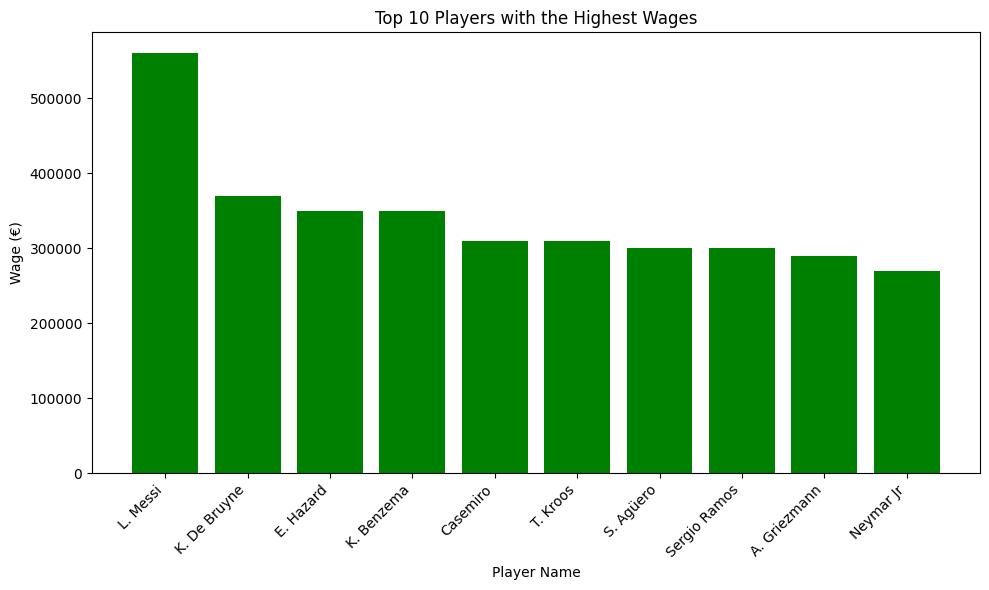

In [53]:
# Sort the data by 'Wage (€)' in descending order (if not already sorted)
best_players.sort_values(by='Wage (€)', ascending=False, inplace=True)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(best_players['Name'], best_players['Wage (€)'], color='green')
plt.xlabel('Player Name')
plt.ylabel('Wage (€)')
plt.title('Top 10 Players with the Highest Wages')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # To avoid overlapping labels
plt.show()

##### Football Players Preferred Foot

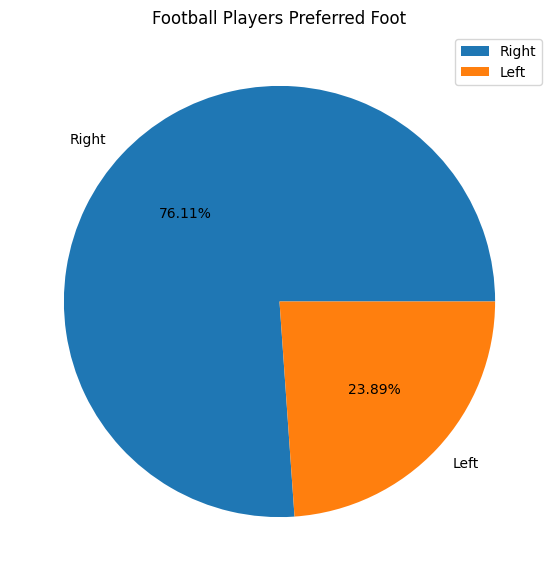

In [54]:
labels = fifa['Preferred Foot'].value_counts().index
values = fifa['Preferred Foot'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, autopct='%1.2f%%')
plt.title("Football Players Preferred Foot")
plt.legend()
plt.show()